<a href="https://colab.research.google.com/github/jubaljacob/Support_Vector_Regression/blob/main/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("Position_Salaries.csv")
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values
print(X,y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


Reshaping y cause it is required for feature scaling

In [25]:
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [26]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [27]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [17]:
# y = y.ravel()
# print(y)............. if needed to changed scaed 2-D y data into 1-D

[-0.72004253 -0.70243757 -0.66722767 -0.59680786 -0.49117815 -0.35033854
 -0.17428902  0.17781001  0.88200808  2.64250325]


In [56]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# Predict New Result

Inverse transformation

In [57]:
sc_y.inverse_transform([regressor.predict(sc_X.transform([[6.5]]))]) 

# since .predict returns a 1-D array [] is needed in inverse_transform() to make the result of the prediction 
# into a 2-D array 

array([[170370.0204065]])

In [ ]:
# y_scaled_pred = regressor.predict(sc_X.transform([[6.5]]))
# print(y_scaled_pred)

In [ ]:
# sc_y.inverse_transform([y_scaled_pred])

In [ ]:
# sc_y.inverse_transform([regressor.predict(sc_X.transform([[6.5]]))])

**Visualising SVR Results**

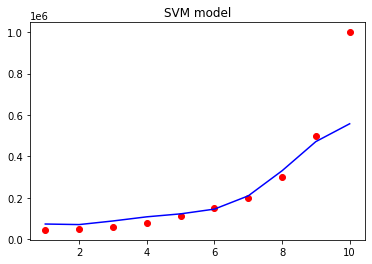

In [58]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color = "red")
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform([regressor.predict(X)]).reshape(10,1), color = "blue" )
plt.title("SVM model")
plt.show()

#reshae(10,1) used for y in plotting is because x and y must have same first dimension, but have 
#shapes (10, 1) and (1, 10) . thus reshape(10,1) is used to reshape y

SVR Results(Higher Resolution)

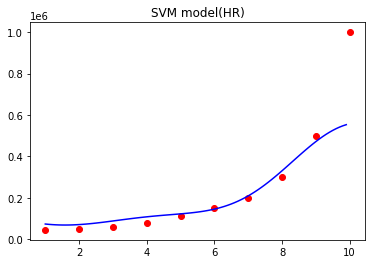

In [64]:
X_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color = "red")
plt.plot(X_grid , sc_y.inverse_transform([regressor.predict(sc_X.transform(X_grid))]).reshape(90,1), color = "blue" )
plt.title("SVM model(HR)")
plt.show()